# Распознавание активности (Human Activity Recognition - HAR)


Подключение модулей

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
RANDOM_STATE = 123

## Анализ исходных данных

Описание: [Human Activity Recognition Using Smartphones Data Set](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones)


Загрузка исходных данных

In [3]:
# Наименования активностей
LABEL_NAMES_FILE = "UCI HAR Dataset/activity_labels.txt"

# Наименование столбцов признаков
FEATURE_NAMES_FILE = "UCI HAR Dataset/features.txt"

# Идентификаторы испытуемых
X_TRAIN_SUBJECT_FILE = "UCI HAR Dataset/train/subject_train.txt"


# Признаки (временные, частотные) и целевых значения (активности)

# Обучающая часть
X_TRAIN_FILE = "UCI HAR Dataset/train/X_train.txt"
Y_TRAIN_FILE = "UCI HAR Dataset/train/y_train.txt"

# Тестовая часть
X_TEST_FILE = "UCI HAR Dataset/test/X_test.txt"
Y_TEST_FILE = "UCI HAR Dataset/test/y_test.txt"

In [4]:
# Загрузка наименований активностей
LABEL_NAMES = list()
with open(LABEL_NAMES_FILE, "r") as fin:
    for line in fin:
        LABEL_NAMES.append(line.split()[1])
LABEL_NAMES

['WALKING',
 'WALKING_UPSTAIRS',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'STANDING',
 'LAYING']

In [5]:
# Загрузка наименований столбцов
CLMS = list()
with open(FEATURE_NAMES_FILE, "r") as fin:
    for line in fin:
        CLMS.append(line.split()[1])
len(CLMS)

561

In [6]:
CLMS = [str(indx+1) +"." + el for indx, el in enumerate(CLMS)]

In [7]:
# Вывод нескольких наименований
CLMS[:5]

['1.tBodyAcc-mean()-X',
 '2.tBodyAcc-mean()-Y',
 '3.tBodyAcc-mean()-Z',
 '4.tBodyAcc-std()-X',
 '5.tBodyAcc-std()-Y']

In [8]:
# Загрузка идентификаторов испытуемых
df_subjects = pd.read_csv(X_TRAIN_SUBJECT_FILE, header=None, sep="\s+", names=["subject"])
df_subjects.head()

,subject
0,1
1,1
2,1
3,1
4,1


In [9]:
# Загрузка признаков
df_features = pd.read_csv(X_TRAIN_FILE, header=None, sep="\s+", names=CLMS)
df_features.head()

,1.tBodyAcc-mean()-X,2.tBodyAcc-mean()-Y,3.tBodyAcc-mean()-Z,4.tBodyAcc-std()-X,5.tBodyAcc-std()-Y,6.tBodyAcc-std()-Z,7.tBodyAcc-mad()-X,8.tBodyAcc-mad()-Y,9.tBodyAcc-mad()-Z,10.tBodyAcc-max()-X,...,552.fBodyBodyGyroJerkMag-meanFreq(),553.fBodyBodyGyroJerkMag-skewness(),554.fBodyBodyGyroJerkMag-kurtosis(),"555.angle(tBodyAccMean,gravity)","556.angle(tBodyAccJerkMean),gravityMean)","557.angle(tBodyGyroMean,gravityMean)","558.angle(tBodyGyroJerkMean,gravityMean)","559.angle(X,gravityMean)","560.angle(Y,gravityMean)","561.angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [10]:
# Загрузка целевых значений
df_labels = pd.read_csv(Y_TRAIN_FILE, header=None, names=["activity"])
df_labels.head(5)

,activity
0,5
1,5
2,5
3,5
4,5


In [11]:
# Формирование одного датафрейма
df = pd.concat([df_subjects, df_features, df_labels], axis=1)
df.head()

,subject,1.tBodyAcc-mean()-X,2.tBodyAcc-mean()-Y,3.tBodyAcc-mean()-Z,4.tBodyAcc-std()-X,5.tBodyAcc-std()-Y,6.tBodyAcc-std()-Z,7.tBodyAcc-mad()-X,8.tBodyAcc-mad()-Y,9.tBodyAcc-mad()-Z,...,553.fBodyBodyGyroJerkMag-skewness(),554.fBodyBodyGyroJerkMag-kurtosis(),"555.angle(tBodyAccMean,gravity)","556.angle(tBodyAccJerkMean),gravityMean)","557.angle(tBodyGyroMean,gravityMean)","558.angle(tBodyGyroJerkMean,gravityMean)","559.angle(X,gravityMean)","560.angle(Y,gravityMean)","561.angle(Z,gravityMean)",activity
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5


Отображение количества различных активностей

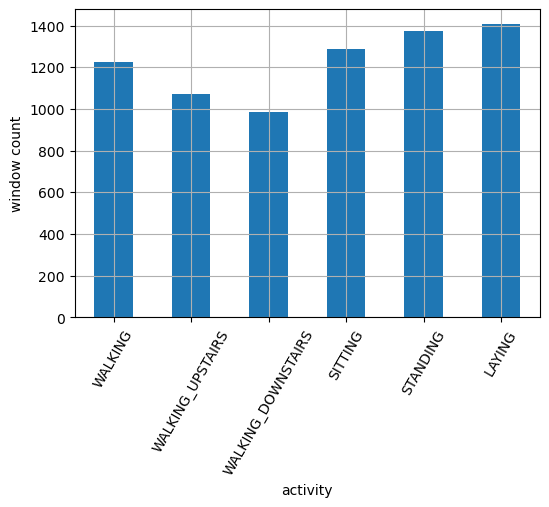

In [12]:
fig, ax = plt.subplots(1, 1)

fig.set_figheight(4)
fig.set_figwidth(6)


ax = df.groupby("activity").size().plot.bar(ax=ax)
ax.set_xticklabels(LABEL_NAMES, rotation=60)
ax.set_ylabel("window count")
ax.grid(True)

Распредление активностей 5го испытуемого

In [13]:
SUBJECT_ID = 5

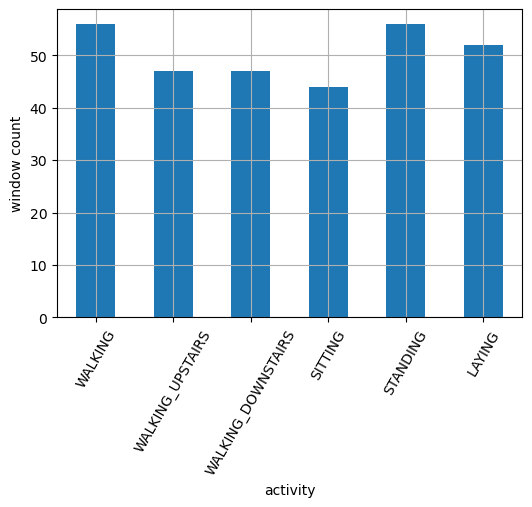

In [14]:
fig, ax = plt.subplots(1, 1)

fig.set_figheight(4)
fig.set_figwidth(6)

ax = df[df["subject"]==SUBJECT_ID]\
    .groupby("activity")\
    .size()\
    .plot.bar(ax=ax)
ax.set_xticklabels(LABEL_NAMES, rotation=60)
ax.set_ylabel("window count")
ax.grid(True)

Отображение данных от акселерометра по координатам

In [15]:
ACC_CLMS = ["1.tBodyAcc-mean()-X", "2.tBodyAcc-mean()-Y", "3.tBodyAcc-mean()-Z", "activity"]

df_acc = df.loc[
    df["subject"]==SUBJECT_ID,
    ACC_CLMS
]

df_acc.index = range(len(df_acc))
df_acc.head()

,1.tBodyAcc-mean()-X,2.tBodyAcc-mean()-Y,3.tBodyAcc-mean()-Z,activity
0,0.196957,0.056390,0.121614,5
1,0.248923,-0.050815,-0.040399,5
2,0.297451,-0.053720,-0.155012,5
3,0.310160,0.018053,-0.223672,5
4,0.301709,-0.002388,-0.143067,5


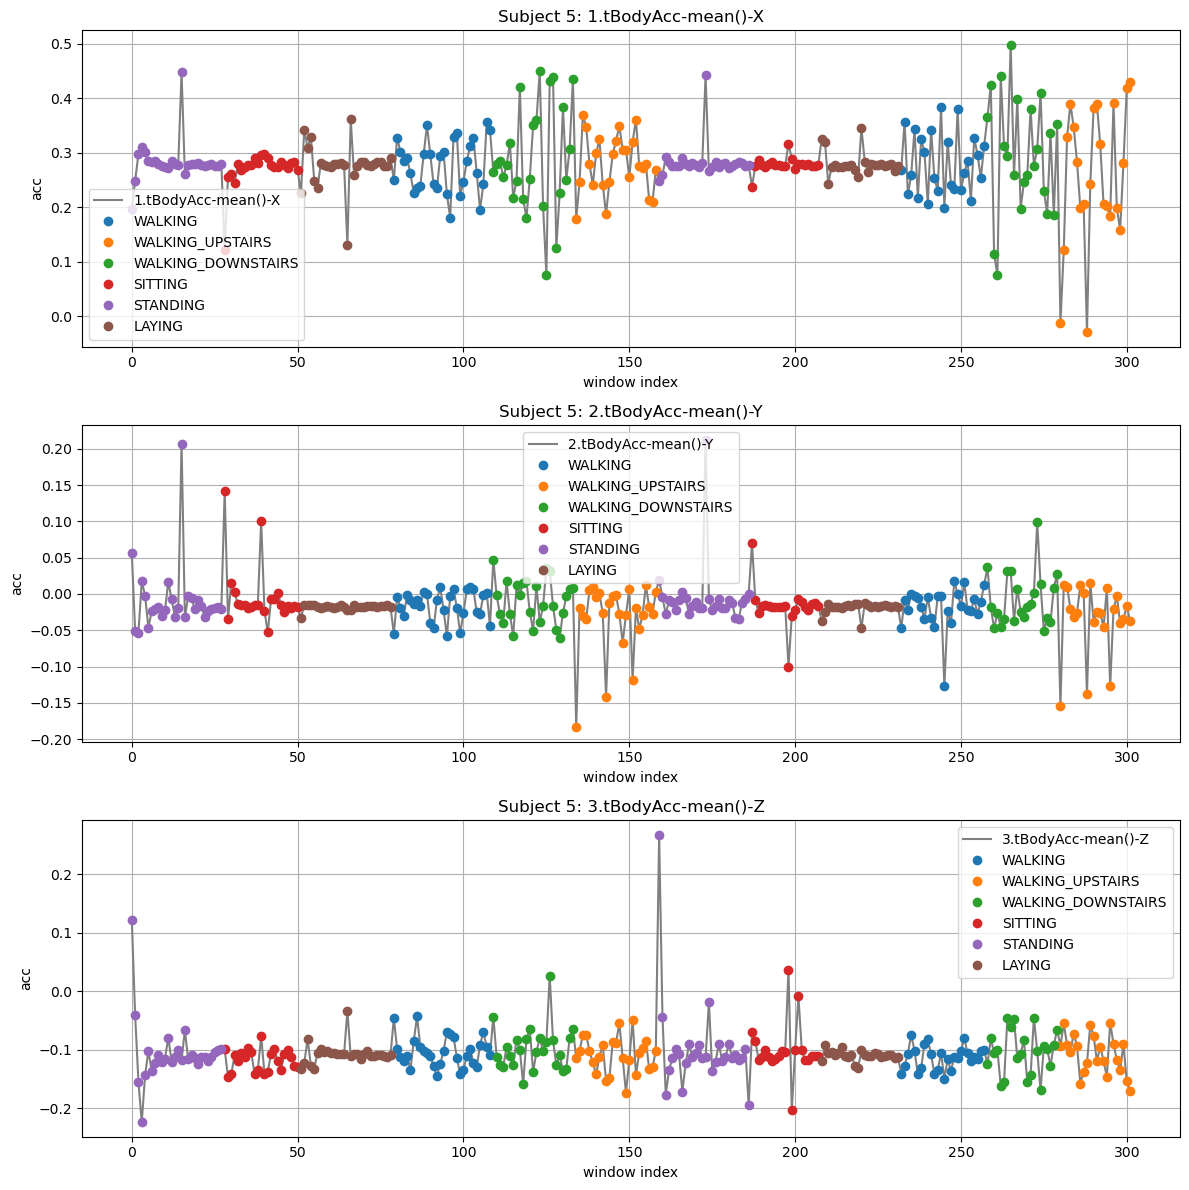

In [16]:
fig, axes = plt.subplots(3, 1)

fig.set_figheight(12)
fig.set_figwidth(12)

for indx, ax in enumerate(axes):

    df_acc[ACC_CLMS[indx]].plot(ax=ax, color="grey")

    ax.set_title("Subject {}: {}".format(SUBJECT_ID, ACC_CLMS[indx]))
    ax.set_xlabel("window index")
    ax.set_ylabel("acc")

    for i in range(1, len(LABEL_NAMES)+1):
        df_acc[df_acc["activity"]==i][ACC_CLMS[indx]].plot(
            marker="o", linestyle="", ax=ax, 
            label=LABEL_NAMES[i-1]
        )

    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

## Выбор модели распознования из алгоритмов классического машинного обучения

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.utils import shuffle

In [18]:
df_ = shuffle(df, random_state=RANDOM_STATE)
df_.head()

,subject,1.tBodyAcc-mean()-X,2.tBodyAcc-mean()-Y,3.tBodyAcc-mean()-Z,4.tBodyAcc-std()-X,5.tBodyAcc-std()-Y,6.tBodyAcc-std()-Z,7.tBodyAcc-mad()-X,8.tBodyAcc-mad()-Y,9.tBodyAcc-mad()-Z,...,553.fBodyBodyGyroJerkMag-skewness(),554.fBodyBodyGyroJerkMag-kurtosis(),"555.angle(tBodyAccMean,gravity)","556.angle(tBodyAccJerkMean),gravityMean)","557.angle(tBodyGyroMean,gravityMean)","558.angle(tBodyGyroJerkMean,gravityMean)","559.angle(X,gravityMean)","560.angle(Y,gravityMean)","561.angle(Z,gravityMean)",activity
1174,6,0.292313,-0.004602,-0.093035,-0.975666,-0.953662,-0.898589,-0.978649,-0.948310,-0.887290,...,-0.582962,-0.889985,-0.016318,0.130722,0.298647,0.055418,-0.681969,0.270244,0.157509,5
1556,7,0.308907,-0.037327,-0.134571,-0.205253,0.140363,0.048250,-0.216939,0.064417,0.048677,...,-0.186753,-0.592584,-0.351819,0.748747,-0.602342,-0.504075,-0.842483,0.207037,0.015731,1
3994,21,0.270290,-0.029851,-0.093731,-0.976067,-0.916127,-0.938908,-0.975743,-0.907796,-0.932168,...,-0.317550,-0.668964,0.032028,-0.205165,0.029780,0.206823,-0.580228,0.329970,0.192599,5
1459,7,0.152418,-0.013601,-0.108788,-0.383088,-0.486195,-0.150383,-0.450391,-0.512334,-0.136913,...,-0.379387,-0.772692,0.694499,-0.107402,0.934983,-0.386551,-0.485035,0.202944,0.369473,2
7195,30,0.274527,-0.032259,-0.110678,-0.990631,-0.687065,-0.885434,-0.991251,-0.676243,-0.864352,...,-0.456202,-0.857197,-0.011990,0.215740,0.867603,-0.868352,-0.888077,0.173534,-0.000707,5


In [19]:
# Загрузка тестового множества
df_test_features = pd.read_csv(X_TEST_FILE, header=None, sep="\s+", names=CLMS)
df_test_labels = pd.read_csv(Y_TEST_FILE, header=None, names=["activity"])

df_test = pd.concat([df_test_features, df_test_labels], axis=1)
df_test.head()

,1.tBodyAcc-mean()-X,2.tBodyAcc-mean()-Y,3.tBodyAcc-mean()-Z,4.tBodyAcc-std()-X,5.tBodyAcc-std()-Y,6.tBodyAcc-std()-Z,7.tBodyAcc-mad()-X,8.tBodyAcc-mad()-Y,9.tBodyAcc-mad()-Z,10.tBodyAcc-max()-X,...,553.fBodyBodyGyroJerkMag-skewness(),554.fBodyBodyGyroJerkMag-kurtosis(),"555.angle(tBodyAccMean,gravity)","556.angle(tBodyAccJerkMean),gravityMean)","557.angle(tBodyGyroMean,gravityMean)","558.angle(tBodyGyroJerkMean,gravityMean)","559.angle(X,gravityMean)","560.angle(Y,gravityMean)","561.angle(Z,gravityMean)",activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,5
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,5
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,5
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,5
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,5


In [20]:
kf = StratifiedKFold(n_splits=3)

In [21]:
models = dict()

# k-ближайших соседей
models["knn"] = (
    KNeighborsClassifier(), {
        "n_neighbors": [3, 5]
    })

# Логистическая регрессия
models["logreg"] = (
    LogisticRegression(
        penalty="l2", 
        solver="newton-cg", 
        multi_class="multinomial",
        random_state=RANDOM_STATE), {
        "C": [0.1, 1]  
    })

# Случайный лес
models["rforest"] = (
    RandomForestClassifier(
        criterion="gini",
        random_state=RANDOM_STATE), {
        "n_estimators": [50, 100]  
    })

# Метод опорных векторов
models["svc"] = (
    SVC(
        kernel="poly",
        degree=3), {
        "C": [0.1, 1]
    })

In [22]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [23]:
df_result = pd.DataFrame(columns=["params", "accuracy"])

for name, (model, params) in models.items():
    grid = GridSearchCV(estimator=model, 
                        param_grid=params, 
                        cv=kf,
                        verbose=2)
    grid.fit(df_[CLMS], df_["activity"])
    df_result.loc[model.__class__.__name__] = (
        grid.best_params_,
        grid.score(df_test[CLMS], df_test["activity"]))

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END ......................................n_neighbors=3; total time=   0.4s
[CV] END ......................................n_neighbors=3; total time=   0.3s
[CV] END ......................................n_neighbors=3; total time=   0.3s
[CV] END ......................................n_neighbors=5; total time=   0.4s
[CV] END ......................................n_neighbors=5; total time=   0.4s
[CV] END ......................................n_neighbors=5; total time=   0.4s
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END ..............................................C=0.1; total time=   3.4s
[CV] END ..............................................C=0.1; total time=   3.4s
[CV] END ..............................................C=0.1; total time=   3.0s
[CV] END ................................................C=1; total time=   3.6s
[CV] END ................................................C=1; total time

In [24]:
# Вывод лучших моделей, их параметров и доли правильных классификаций
df_result.head()

,params,accuracy
KNeighborsClassifier,{'n_neighbors': 3},0.890736
LogisticRegression,{'C': 1},0.961317
RandomForestClassifier,{'n_estimators': 100},0.928402
SVC,{'C': 1},0.957923


## Использование сверточной нейронной сети

In [25]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [26]:
# преобразование данных для сверточной нейронной сети
X_train = df_[CLMS].to_numpy()
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

X_test = df_test[CLMS].to_numpy()
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

y_train = df_["activity"].to_numpy()
y_test = df_test["activity"].to_numpy()

In [27]:
# Преобразование меток в категории
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train.ravel())
y_test = encoder.transform(y_test.ravel())

# Преобразование меток в one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [28]:
y_train.shape

(7352, 6)

In [29]:
# Создание модели
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
# Обучение модели
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
230/230 [==============================] - 10s 41ms/step - loss: 0.4593 - accuracy: 0.8161 - val_loss: 0.1788 - val_accuracy: 0.9260
Epoch 2/20
230/230 [==============================] - 11s 48ms/step - loss: 0.1620 - accuracy: 0.9388 - val_loss: 0.1409 - val_accuracy: 0.9474
Epoch 3/20
230/230 [==============================] - 10s 43ms/step - loss: 0.1339 - accuracy: 0.9480 - val_loss: 0.1653 - val_accuracy: 0.9345
Epoch 4/20
230/230 [==============================] - 10s 42ms/step - loss: 0.1033 - accuracy: 0.9601 - val_loss: 0.1649 - val_accuracy: 0.9372
Epoch 5/20
230/230 [==============================] - 10s 44ms/step - loss: 0.0807 - accuracy: 0.9697 - val_loss: 0.1769 - val_accuracy: 0.9427
Epoch 6/20
230/230 [==============================] - 11s 49ms/step - loss: 0.0693 - accuracy: 0.9718 - val_loss: 0.1597 - val_accuracy: 0.9528
Epoch 7/20
230/230 [==============================] - 10s 44ms/step - loss: 0.0709 - accuracy: 0.9721 - val_loss: 0.1329 - val_accuracy:

In [31]:
# Оценка модели
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

93/93 [==============================] - 1s 9ms/step - loss: 0.2222 - accuracy: 0.9454
Accuracy: 94.54%


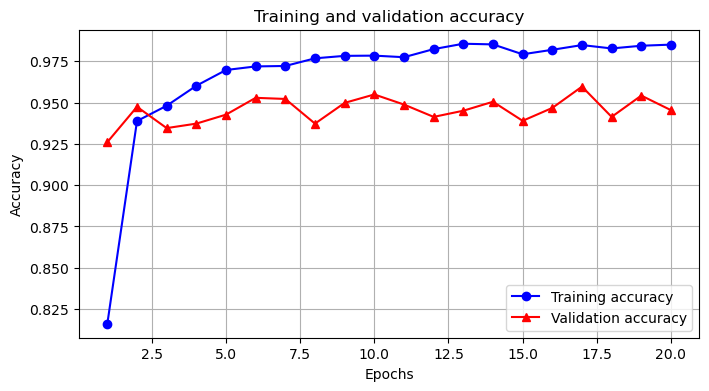

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# Построение графика точности обучения и валидации
plt.figure(figsize=(8, 4))
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r^-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [34]:
# Получение предсказаний
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

93/93 [==============================] - 1s 8ms/step


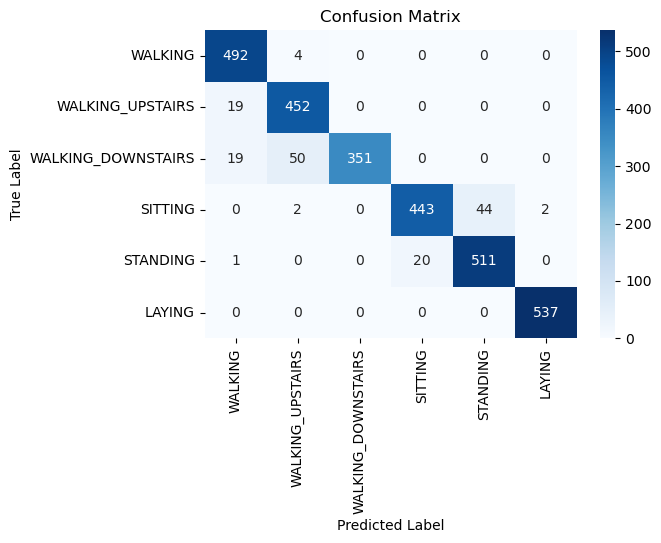

In [35]:
# Вычисление матрицы ошибок
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Визуализация матрицы ошибок
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=LABEL_NAMES, yticklabels=LABEL_NAMES)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Использование LSTM-нейронной сети

In [39]:
from tensorflow.keras.layers import LSTM

In [40]:
# Создание модели
model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
# Обучение модели
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/25
230/230 [==============================] - 80s 333ms/step - loss: 1.3932 - accuracy: 0.2977 - val_loss: 1.1272 - val_accuracy: 0.4038
Epoch 2/25
230/230 [==============================] - 75s 327ms/step - loss: 1.1026 - accuracy: 0.4158 - val_loss: 1.0700 - val_accuracy: 0.4279
Epoch 3/25
230/230 [==============================] - 76s 331ms/step - loss: 1.0394 - accuracy: 0.4669 - val_loss: 1.0221 - val_accuracy: 0.4632
Epoch 4/25
230/230 [==============================] - 76s 330ms/step - loss: 1.0036 - accuracy: 0.4895 - val_loss: 0.9710 - val_accuracy: 0.4917
Epoch 5/25
230/230 [==============================] - 76s 331ms/step - loss: 0.9716 - accuracy: 0.5080 - val_loss: 0.9492 - val_accuracy: 0.5070
Epoch 6/25
230/230 [==============================] - 76s 329ms/step - loss: 0.9581 - accuracy: 0.5175 - val_loss: 0.9189 - val_accuracy: 0.5341
Epoch 7/25
230/230 [==============================] - 76s 330ms/step - loss: 0.9418 - accuracy: 0.5329 - val_loss: 0.9677 - val_ac

In [42]:
# Оценка модели
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

93/93 [==============================] - 9s 100ms/step - loss: 0.3390 - accuracy: 0.8541
Accuracy: 85.41%


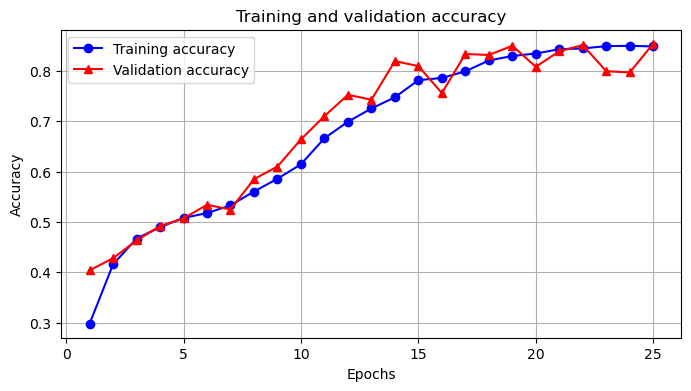

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(8, 4))
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r^-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

93/93 [==============================] - 10s 98ms/step


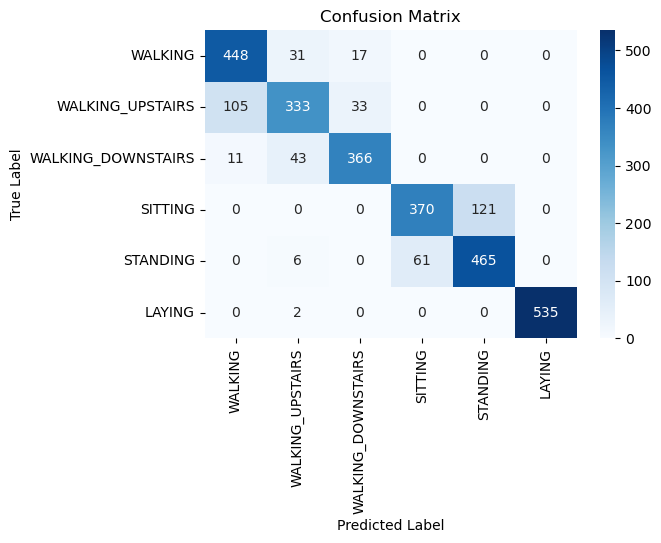

In [44]:
# Получение предсказаний
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Вычисление матрицы ошибок
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Визуализация матрицы ошибок
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=LABEL_NAMES, yticklabels=LABEL_NAMES)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Использование CNN+LSTM модели

In [50]:
# Создание модели
model = Sequential()

# Добавление сверточных слоев
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

# Добавление слоев LSTM
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dropout(0.5))

# Добавление полносвязных слоев
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/25
230/230 [==============================] - 103s 436ms/step - loss: 1.2670 - accuracy: 0.3509 - val_loss: 1.0730 - val_accuracy: 0.4245
Epoch 2/25
230/230 [==============================] - 100s 433ms/step - loss: 1.0860 - accuracy: 0.4294 - val_loss: 1.0314 - val_accuracy: 0.4628
Epoch 3/25
230/230 [==============================] - 102s 442ms/step - loss: 0.8889 - accuracy: 0.5613 - val_loss: 0.6944 - val_accuracy: 0.6678
Epoch 4/25
230/230 [==============================] - 99s 432ms/step - loss: 0.6288 - accuracy: 0.6821 - val_loss: 0.6071 - val_accuracy: 0.7482
Epoch 5/25
230/230 [==============================] - 100s 433ms/step - loss: 0.5692 - accuracy: 0.7271 - val_loss: 0.5223 - val_accuracy: 0.7927
Epoch 6/25
230/230 [==============================] - 103s 450ms/step - loss: 0.4980 - accuracy: 0.7737 - val_loss: 0.4485 - val_accuracy: 0.8398
Epoch 7/25
230/230 [==============================] - 100s 434ms/step - loss: 0.4283 - accuracy: 0.8251 - val_loss: 0.3839 - 

In [52]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

93/93 [==============================] - 11s 122ms/step - loss: 0.3157 - accuracy: 0.9057
Accuracy: 90.57%


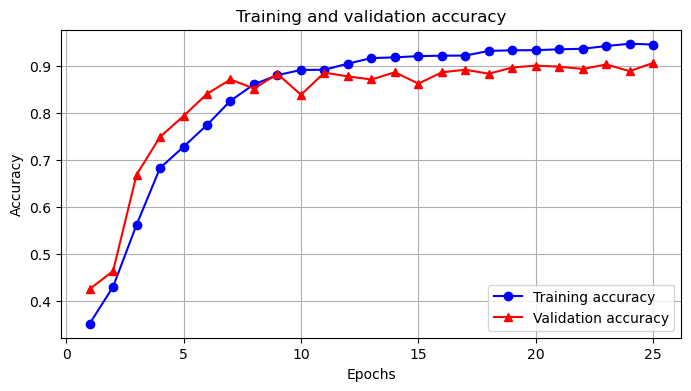

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(8, 4))
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r^-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

93/93 [==============================] - 12s 122ms/step


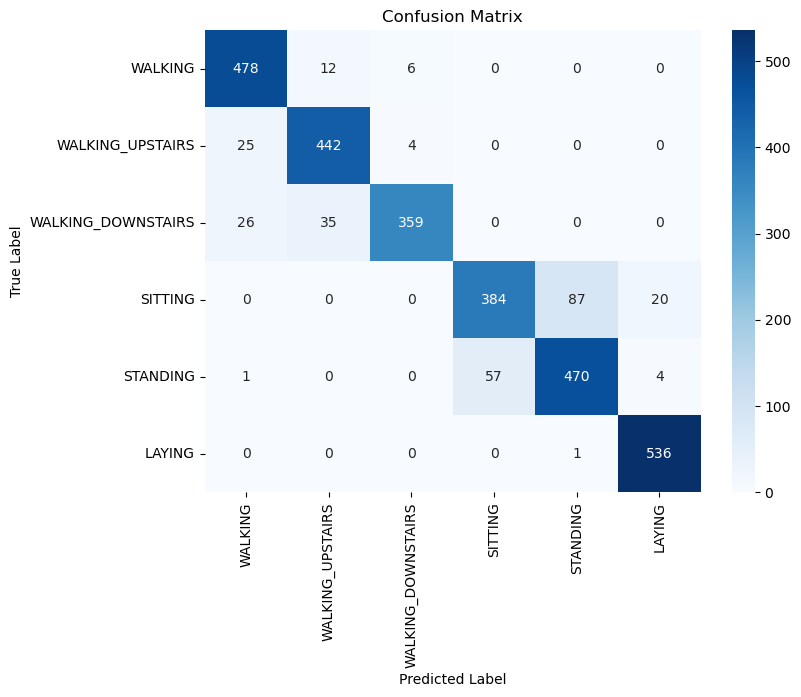

In [54]:
# Получение предсказаний
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Вычисление матрицы ошибок
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=LABEL_NAMES, yticklabels=LABEL_NAMES)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Вывод
<p>Для распознавания активностей человека можно применять как алгоритмы классического машинного обучения(метод ближайших соседей, логистическая регрессия, случайный лес и т.д.), так и алгоритмы нейронных сетей, в частности сверточные. </p>
<p>Из алгоритмов классического машинного обучения в данном случае наибольшую accuracy имеет логистическая регрессия, а из нейронных сетей наилучший результат показывает CNN с двумя сверточными слоями.</p>
<p>Для дальнейшего улучшения точности моделей можно сделать больше предобработки данных: нормализация, уменьшение размерности пространства признаков (PCA) и т.д.</p>